<a href="https://colab.research.google.com/github/TyroneNorth/Star-Classification-PyCaret/blob/master/Stars_Classification_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stars Dataset with Pycaret low-code ML solution

In [0]:
#install pycaret and dependencies, requires Kernel restart
pip install pycaret

In [0]:
#import libraries
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [0]:
#Read in csv file
stars = pd.read_csv('/content/drive/My Drive/Documents/Datasets/Stars/6 class csv.csv')

In [0]:
#view first five rows
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M


In [0]:
#descriptive stats
stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [0]:
#Missing values
stars.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

#Preprocessing

In [0]:
#data setup, transformations, train/test/split, normalize
starset = setup(data = stars, target = 'Star type', train_size = 0.7, normalize = True, normalize_method = 'minmax' )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7318
1,Target Type,Multiclass
2,Label Encoded,"Brown Dwarf: 0, Hyper Giant: 1, Main Sequence: 2, Red Dwarf: 3, Super Giant: 4, White Dwarf: 5"
3,Original Data,"(240, 7)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


#Model Training

In [0]:
#comparison of all model for selection and tuning 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,Extreme Gradient Boosting,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,CatBoost Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting Classifier,0.988200,0.000000,0.988900,0.994100,0.987300,0.986000
4,Random Forest Classifier,0.987900,0.000000,0.988900,0.991400,0.987700,0.985400
5,Light Gradient Boosting Machine,0.987900,0.000000,0.988900,0.990900,0.987500,0.985400
6,Extra Trees Classifier,0.987500,0.000000,0.986100,0.991700,0.987100,0.984900
7,K Neighbors Classifier,0.934600,0.000000,0.933300,0.937000,0.925400,0.921300
8,Decision Tree Classifier,0.928700,0.000000,0.922200,0.944900,0.922300,0.914200
9,Linear Discriminant Analysis,0.916200,0.000000,0.916700,0.939300,0.911500,0.899100


In [0]:
#create adaB model
adaB = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


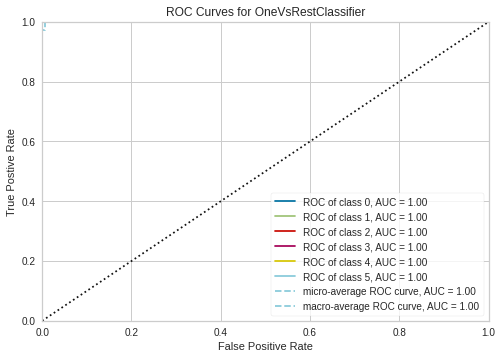

In [0]:
#ROC for adaB
plot_model(adaB)

In [0]:
#Tuning the hyperparameter
tuned_adaB = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


#Predictions

In [0]:
#Ada Boost Predictions
adaB_pred = predict_model(tuned_adaB)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9726,0,0.9722,0.9763,0.9723,0.9671


In [0]:
#Decision Tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,0.8235,0.0,0.8333,0.9118,0.8176,0.7875
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
3,0.8824,0.0,0.8333,0.7941,0.8319,0.8571
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,0.8235,0.0,0.8333,0.9294,0.8261,0.7901
6,0.8824,0.0,0.8889,0.9020,0.8824,0.8589
7,0.9375,0.0,0.9167,0.9583,0.9333,0.9245
8,0.9375,0.0,0.9167,0.9531,0.9315,0.9242
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000


#Model Tuning

In [0]:
#Tuning the hyperparameter
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9412,0.0,0.9444,0.9559,0.9395,0.9292
1,0.8235,0.0,0.8333,0.8706,0.8088,0.7875
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
3,0.9412,0.0,0.9167,0.9559,0.9356,0.9289
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,0.8824,0.0,0.8889,0.9412,0.8725,0.8595
6,0.9412,0.0,0.9444,0.9608,0.9412,0.9295
7,0.9375,0.0,0.9167,0.9583,0.9333,0.9245
8,0.9375,0.0,0.9167,0.9531,0.9315,0.9242
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000


#Evaluation

In [0]:
#plot all charts for model evaluation
evaluate_model(tuned_adaB)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [0]:
#model evaluation
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [0]:
#Decision Tree predictions
dt_pred = predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9863,0,0.9861,0.9873,0.9863,0.9836


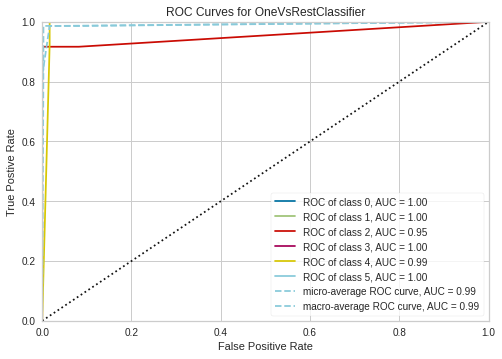

In [0]:
#ROC Decision Tree
plot_model(tuned_dt)

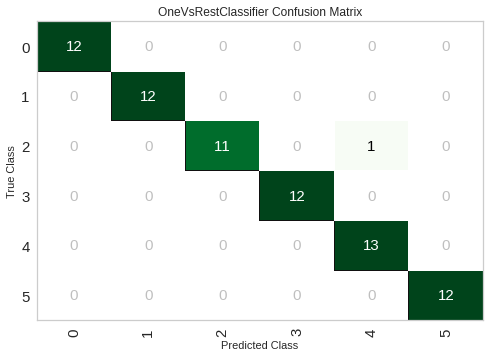

In [48]:
#Confusion Matrix
plot_model(tuned_dt, 'confusion_matrix')

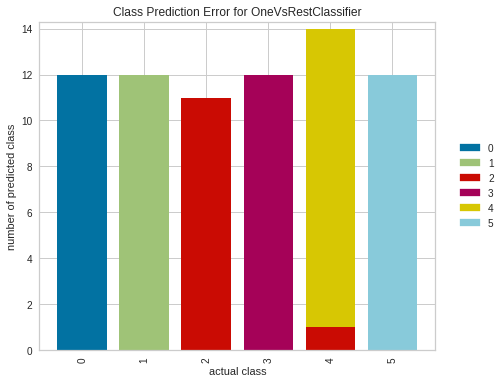

In [49]:
plot_model(tuned_dt, 'error')

#Finalization, save transformation pipeline and model

In [0]:
dt_final = finalize_model(tuned_dt)

In [0]:
save_model(tuned_dt, 'stars_dt')
save_model(tuned_adaB, 'adaB_class')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [0]:
save_experiment('exp05112020')

Experiment Succesfully Saved
